In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
heart_train = pd.read_csv('heart.csv')
heart_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**looking at the data types present**

In [10]:
heart_train.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [35]:
heart_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [37]:
len(heart_train)

303

##QN 2

###list of Categorical Variables

In [24]:
numerical_discrete = []
for column in heart_train.columns:
    if heart_train[column].dtypes != 'object':
        if heart_train[column].nunique() <= 5:
            numerical_discrete.append(column)
numerical_discrete.remove('target')
numerical_discrete

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

###list of continous variables

In [22]:
numerical_continuous = []
for column in heart_train.columns:
    if heart_train[column].dtypes != 'object':
        if heart_train[column].nunique() > 5:
            numerical_continuous.append(column)
# numerical_continuous.remove('charges')
numerical_continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

###Looking into outliers of the Continous variables


In [27]:
continous = heart_train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
continous

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [56]:
Q1 = continous.quantile(0.25)
Q3 = continous.quantile(0.75)
IQR = Q3 - Q1

In [61]:
#filtering outliers using IQR
removed_outliers = continous[~((continous < (Q1 - 1.5 * IQR)) | (continous > (Q3 + 1.5 * IQR))).any(axis=1)]

In [60]:
removed_outliers

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


###Binning The Continous Columns Except oldpeak into 4 bins

In [73]:
pd.qcut(removed_outliers['age'], q=4),pd.qcut(removed_outliers['chol'], q=4), pd.qcut(removed_outliers['trestbps'], q=4), pd.qcut(removed_outliers['thalach'], q=4)

(0         (60.0, 77.0]
 1      (28.999, 46.75]
 2      (28.999, 46.75]
 3         (55.0, 60.0]
 4         (55.0, 60.0]
             ...       
 298       (55.0, 60.0]
 299    (28.999, 46.75]
 300       (60.0, 77.0]
 301       (55.0, 60.0]
 302       (55.0, 60.0]
 Name: age, Length: 284, dtype: category
 Categories (4, interval[float64]): [(28.999, 46.75] < (46.75, 55.0] < (55.0, 60.0] < (60.0, 77.0]],
 0        (209.75, 239.0]
 1        (239.0, 270.25]
 2      (125.999, 209.75]
 3        (209.75, 239.0]
 4        (270.25, 360.0]
              ...        
 298      (239.0, 270.25]
 299      (239.0, 270.25]
 300    (125.999, 209.75]
 301    (125.999, 209.75]
 302      (209.75, 239.0]
 Name: chol, Length: 284, dtype: category
 Categories (4, interval[float64]): [(125.999, 209.75] < (209.75, 239.0] < (239.0, 270.25] <
                                     (270.25, 360.0]],
 0       (140.0, 170.0]
 1       (120.0, 130.0]
 2       (120.0, 130.0]
 3      (93.999, 120.0]
 4      (93.999, 120.0

In [79]:
heart_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

###lokking at the feature importance of the different features

In [86]:
#seperating features from target variables
X = heart_train.iloc[:,0:13]  #independent columns
y = heart_train.iloc[:,-1]    #target column i.e target

[0.07038749 0.0561023  0.13207436 0.06393423 0.06139928 0.01935218
 0.03416835 0.08725341 0.10226773 0.0784813  0.07247308 0.12006845
 0.10203787]


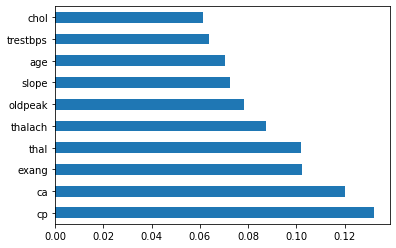



The Important Features would be 
 oldpeak 
 thalach 
 thal 
 exang 
 cp 
 ca


In [87]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
print('\n')
print('The Important Features would be \n oldpeak \n thalach \n thal \n exang \n cp \n ca')

###Slicing and preprocessing the data

In [93]:
#picking columns of best choice
x_data = heart_train[['age', 'sex', 'cp', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y_data = heart_train['target']

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=27)

In [94]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

###training the model

In [100]:
from sklearn.metrics import confusion_matrix

In [102]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train_norm, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [103]:
predic = dtree.predict(X_test)

In [105]:
print(confusion_matrix(y_test, predic))

[[32 10]
 [23 26]]


In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train_norm,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [110]:
predictions = knn.predict(X_test)

In [114]:
print('Accuracy of KNN on test set: {:.2f}'.format(knn.score(X_test,y_test)))

Accuracy of KNN on test set: 0.54
